In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataset which is available in kaggle
tmdb=pd.read_csv('tmdb.csv')

In [3]:
#five records of the dataset
tmdb.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [4]:
#number of records in a dataset
tmdb.shape

(10000, 6)

In [5]:
#remove the unneccessary columns
tmdb.drop(columns='Unnamed: 0',inplace=True)

In [6]:
tmdb.head()

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


# Weighted Average Formula is used for collaborative recommendation system

### Weighted Average Formula:

$${W}=(\frac{Voters*AvgRating}{Voters+minVoters})+(\frac{minVoters*meanVoters}{Voters+minVoters})$$

Basically the Weighted Avearge concepts helps to reduce the nature of bias in the dataset which means there may be more voters rating with higher scores than the exact same rating score having less voters. 

In [25]:
#instantiating the mean and minimum voters
av=tmdb['vote_average'].mean()
mv=tmdb['vote_count'].quantile(.40)

In [26]:
mv

238.0

In [28]:
#filtering the dataset as per minimum votes contain
fil_mov=tmdb[tmdb['vote_count']>=mv]

In [51]:
#weighted average formula
def weg_avg(x,minivoters=mv,meanvoters=av):
    voters=x['vote_count']
    avg_v=x['vote_average']
    return (voters/(voters+minivoters)*avg_v)+(minivoters/(voters+minivoters)*meanvoters)

In [52]:
#apply the formula in already filtered dataset to calculate the scores
fil_mov['score']=fil_mov.apply(weg_avg,axis=1)

/var/folders/d2/v_pq11hn76q7r2f5yksqq2000000gn/T/ipykernel_1073/313610831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_mov['score']=fil_mov.apply(weg_avg,axis=1)


In [34]:
#sorting them according to the descending order
fil_mov.sort_values('score',ascending=False,inplace=True)

/var/folders/d2/v_pq11hn76q7r2f5yksqq2000000gn/T/ipykernel_1073/1796388736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_mov.sort_values('score',ascending=False,inplace=True)


In [35]:
fil_mov

,title,overview,original_language,vote_count,vote_average,score
96,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,en,15522,8.7,8.663850
110,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",en,11768,8.7,8.652547
357,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",hi,2230,8.8,8.559515
252,Schindler's List,The true story of how businessman Oskar Schind...,en,9366,8.6,8.543157
216,Pulp Fiction,"A burger-loving hit man, his philosophical par...",en,18003,8.5,8.471377
...,...,...,...,...,...,...
3201,The Open House,A teenager and his mother find themselves besi...,en,956,3.7,4.219500
3303,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",en,461,2.9,4.059775
5095,Disaster Movie,"The filmmaking team behind the hits ""Scary Mov...",en,595,3.1,4.016066
5181,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",en,795,3.3,3.992626


In [39]:
pd.set_option('display.precision',1)

In [40]:
fil_mov

,title,overview,original_language,vote_count,vote_average,score
96,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,en,15522,8.7,8.7
110,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",en,11768,8.7,8.7
357,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",hi,2230,8.8,8.6
252,Schindler's List,The true story of how businessman Oskar Schind...,en,9366,8.6,8.5
216,Pulp Fiction,"A burger-loving hit man, his philosophical par...",en,18003,8.5,8.5
...,...,...,...,...,...,...
3201,The Open House,A teenager and his mother find themselves besi...,en,956,3.7,4.2
3303,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",en,461,2.9,4.1
5095,Disaster Movie,"The filmmaking team behind the hits ""Scary Mov...",en,595,3.1,4.0
5181,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",en,795,3.3,4.0


In [41]:
fil_mov.head(6)

,title,overview,original_language,vote_count,vote_average,score
96,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,en,15522,8.7,8.7
110,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",en,11768,8.7,8.7
357,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",hi,2230,8.8,8.6
252,Schindler's List,The true story of how businessman Oskar Schind...,en,9366,8.6,8.5
216,Pulp Fiction,"A burger-loving hit man, his philosophical par...",en,18003,8.5,8.5
772,The Green Mile,A supernatural tale set on death row in a Sout...,en,9740,8.5,8.4


In [ ]:
def recommend(movie):
    

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

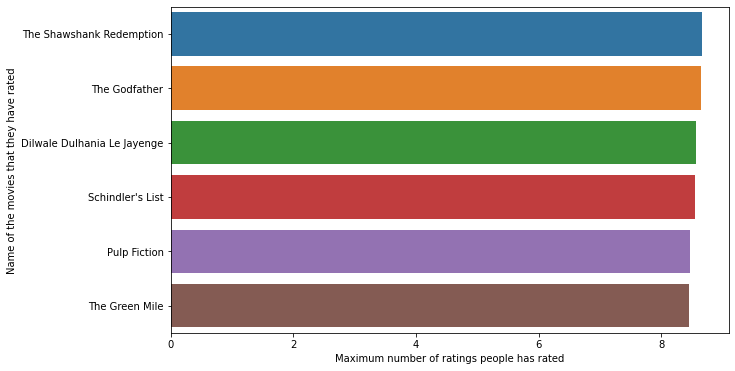

In [48]:
#plotting the top six movies having high ratings rated by people
plt.figure(figsize=(10,6))
sns.barplot(y='score',x='title',data=fil_mov.head(6))
plt.xlabel('Maximum number of ratings people has rated')
plt.ylabel('Name of the movies that they have rated')
plt.show()